# Training and Running of new GLM model
This Notebook is for training and running the our new GLM model that includes (for now only) deletion tokens

## Adding necessary imports
You can run this block to import necessary classes and functions

In [1]:
from fundemental_classes.model_related.glm_model import GLMModel

# You can change force_retrain to True if you want to always retrain your model everytime
model = GLMModel("./dna_bert_final", "simulated_sequences/augumented_sequence_size20000_length40_deletions0.2_nodeletionseq0.1.fasta", force_retrain=False)

/home/giokepa/.virtualenvs/Sysgen-GLM-for-Indels/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Checking for existing trained model in ./dna_bert_final
Loading tokenizer...
Tokenizer loaded
Loading dataset...
Dataset loaded
Loading model...
Model loaded successfully!
Trained for 20 epochs
Final validation loss: 0.9409


## Training
We use `Bert` model to create the embeddings and train it using masking to get nicely trained model. If you want to change the size of training data, please look into `simulated_sequences` directory. \\\
*important:* Training is not necessary if you already have a trained model. You can load it using the `GLMModel`.

In [ ]:
model.train(epochs=20, batch_size=16, lr=2e-4)

## Visualization | Sequence reconstruction probabilities
This block is used for getting already trained model, passing the sequence to test how well the model performs.
\\\\\
*Important:* For now we pass our test cases by hand. However in the future we will generate good inputs to test how well the model functions

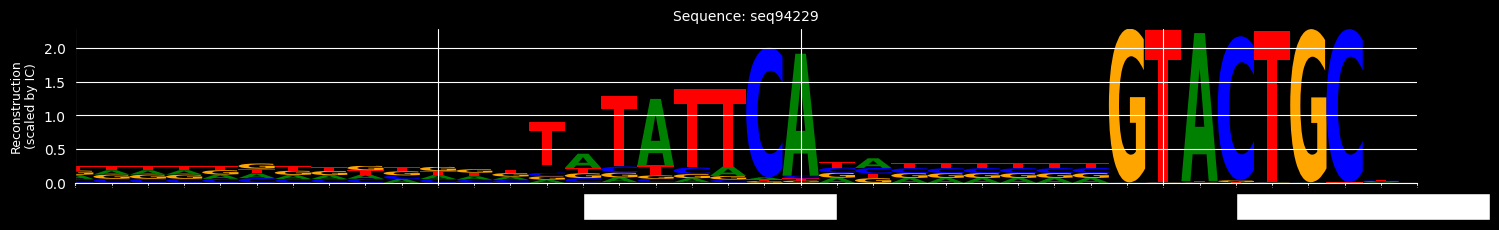

In [5]:
from fundemental_classes.visualization.sequence_plotter import plot


header = "seq94229|label=both|posAmotif=14|posBmotif=32|gaplength=10|deletions=3"
sequence = "ATCGT-GCGACGAAATATTCA-TTTTTTTGTACTGCT"
prob_matrix = model.get_full_reconstruction_probs(sequence)

plot(header, sequence, prob_matrix, motif_length=7)

## Visualization | Dependency Map
This block is used for getting already trained model, passing the sequence to test how well the model performs.
\\\\\

Computing dependency map...


Map: 100%|██████████| 165/165 [00:00<00:00, 11236.02 examples/s]


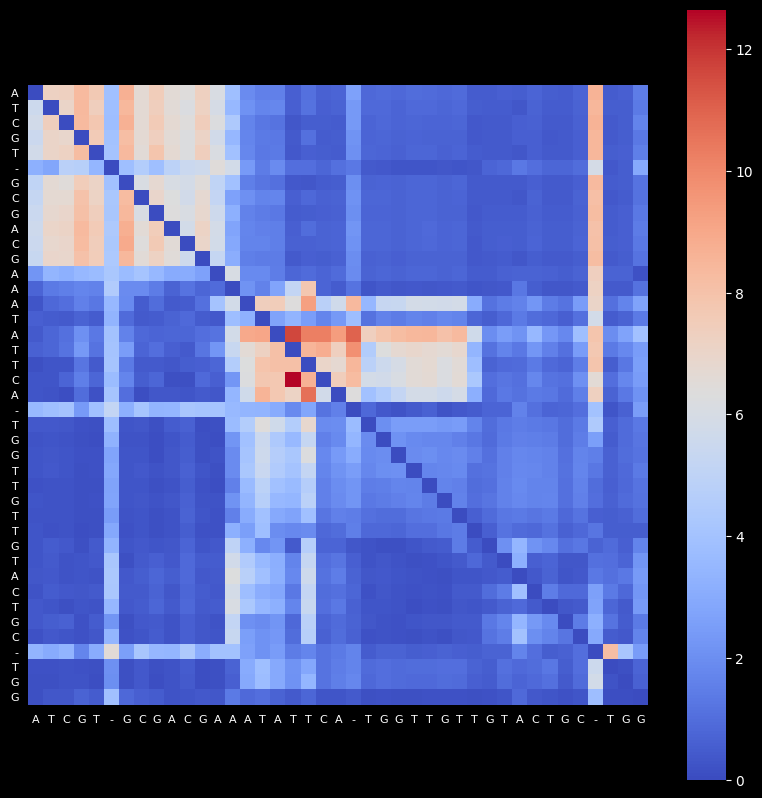

In [6]:
from fundemental_classes.visualization.heat_map_plotter import DependencyMapGenerator

dep_gen = DependencyMapGenerator(model)

header = "seq94229|label=both|posAmotif=14|posBmotif=32|gaplength=10|deletions=3"
sequence = "ATCGT-GCGACGAAATATTCA-TGGTTGTTGTACTGC-TGG"
dep_map = dep_gen.analyze(sequence)
